# Analyzing Yelp dataset

## Introduction

Yelp released their dataset for the last couple of years and people have done interesting work with it.



In [4]:
from mongodb import *

mongo_helper = MongoDBHelper('yelp')

Creating Collection: businesses
Creating Collection: checkins
Creating Collection: reviews
Creating Collection: tips
Creating Collection: users



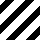
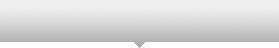
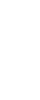
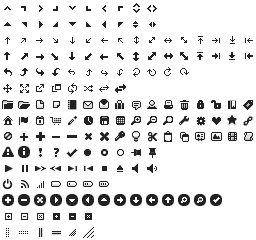
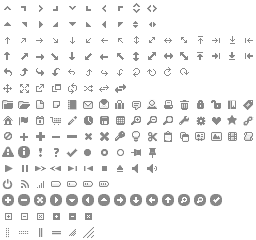
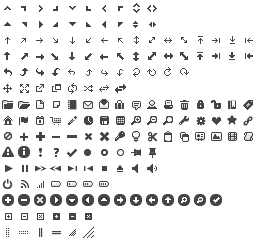
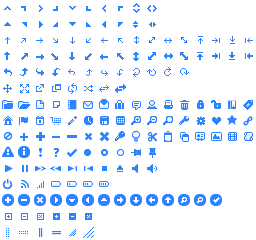
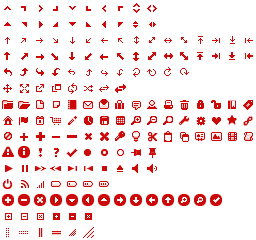
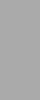
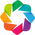
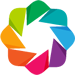
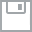
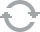
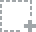
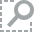
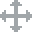
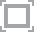
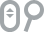

In [16]:
import numpy as np
from bokeh.charts import Bar, show
from bokeh.io import output_notebook

five_star_reviews = mongo_helper.reviews.query().filter(stars = 5).count().execute().get()

four_star_reviews = mongo_helper.reviews.query().filter(stars = 4).count().execute().get()

three_star_reviews = mongo_helper.reviews.query().filter(stars = 3).count().execute().get()

two_star_reviews = mongo_helper.reviews.query().filter(stars = 2).count().execute().get()

one_star_reviews = mongo_helper.reviews.query().filter(stars = 1).count().execute().get()

output_notebook()

In [17]:
from bokeh.charts import Bar, output_file, show
from collections import OrderedDict

xyvalues = OrderedDict()
xyvalues["xy"] = [one_star_reviews, two_star_reviews, three_star_reviews, four_star_reviews, five_star_reviews]
x_labels = ["1 star", "2 star", "3 star", "4 star", "5 star"]

bar = Bar(xyvalues, x_labels, title="Review Stars", xlabel="Stars", ylabel="Review", width=1000)
show(bar)

# Word Cloud

At this point we have a dataframe which we can use to plot a word cloud. We will use this to experiment with the api.

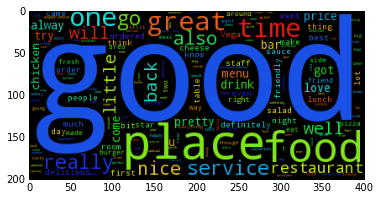

In [18]:
%matplotlib inline

reviews_txt_df = mongo_helper.reviews.query().filter(stars = 4).projection(text=1, _id=0).execute().dataframe()
col = reviews_txt_df["text"]

txt = ""
for line in col:
    txt += " " + line

from wordcloud import WordCloud
word_cloud = WordCloud().generate(txt)
word_cloud.to_file("wordcloud.png")

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgplot = plt.imshow(word_cloud.to_image())
plt.axis("off")


## Splitting up reviews into their respective Star ratings

Review text now needs to be split up so we can take the text only relevant to their respective star ratings. This should allow us to take this data and then create word clouds for unigrams, bigrams and trigrams

In [6]:
%matplotlib inline

def create_txt(df):
    col = df["text"]
    txt = ""
    
    for line in col:
        txt += " " + line
        
    return txt

def create_word_cloud(txt):
    from wordcloud import WordCloud
    word_cloud = WordCloud().generate(txt)

    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt

    imgplot = plt.imshow(word_cloud.to_image())
    plt.axis("off")

## 5 Star Reviews

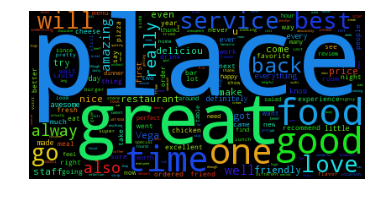

In [7]:
five_star_review_txt_df = mongo_helper.reviews.query().filter(stars = 5).projection(text=1, _id=0).execute().dataframe()
five_star_txt = create_txt(five_star_review_txt_df)
create_word_cloud(five_star_txt)

## 4 Star Reviews

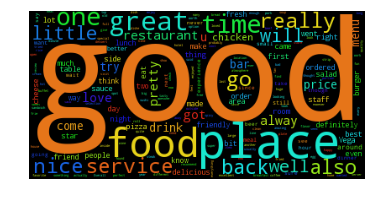

In [19]:
four_star_review_txt_df = mongo_helper.reviews.query().filter(stars = 4).projection(text=1, _id=0).execute().dataframe()
four_star_txt = create_txt(four_star_review_txt_df)
create_word_cloud(four_star_txt)

## 3 Star Reviews

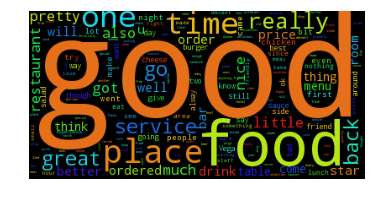

In [24]:
three_star_review_txt_df = mongo_helper.reviews.query().filter(stars = 3).projection(text=1, _id=0).execute().dataframe()
three_star_txt = create_txt(three_star_review_txt_df)
create_word_cloud(three_star_txt)

## 2 Star Reviews

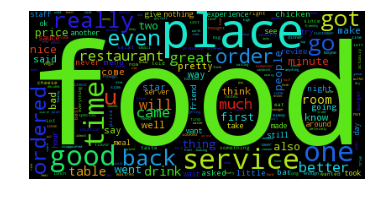

In [25]:
two_star_review_txt_df = mongo_helper.reviews.query().filter(stars = 2).projection(text=1, _id=0).execute().dataframe()
two_star_txt = create_txt(two_star_review_txt_df)
create_word_cloud(two_star_txt)

## 1 Star Reviews

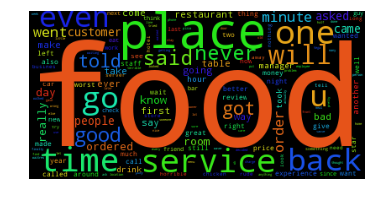

In [26]:
one_star_review_txt_df = mongo_helper.reviews.query().filter(stars = 1).projection(text=1, _id=0).execute().dataframe()
one_star_txt = create_txt(one_star_review_txt_df)
create_word_cloud(one_star_txt)

# Unigrams, Bigrams & Trigrams

## NLTK

In [8]:
import nltk
from nltk import bigrams, trigrams
from nltk.tokenize import word_tokenize

## 5 Star Reviews

In [14]:
# five_star_unigram = nltk.unigrams(five_star_txt)
tokenized_five_star = word_tokenize(five_star_txt)
five_star_bigram = nltk.bigrams(tokenized_five_star)
five_star_trigram = nltk.trigrams(tokenized_five_star)

for count, item in enumerate(five_star_bigram):
    if (count > 10):
        break
    print(item)

('dr.', 'goldberg')
('goldberg', 'offers')
('offers', 'everything')
('everything', 'i')
('i', 'look')
('look', 'for')
('for', 'in')
('in', 'a')
('a', 'general')
('general', 'practitioner')
('practitioner', '.')
